In [292]:
import kagglehub
import numpy as np
import pandas as pd
import scipy.linalg as la
from PIL import Image
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf

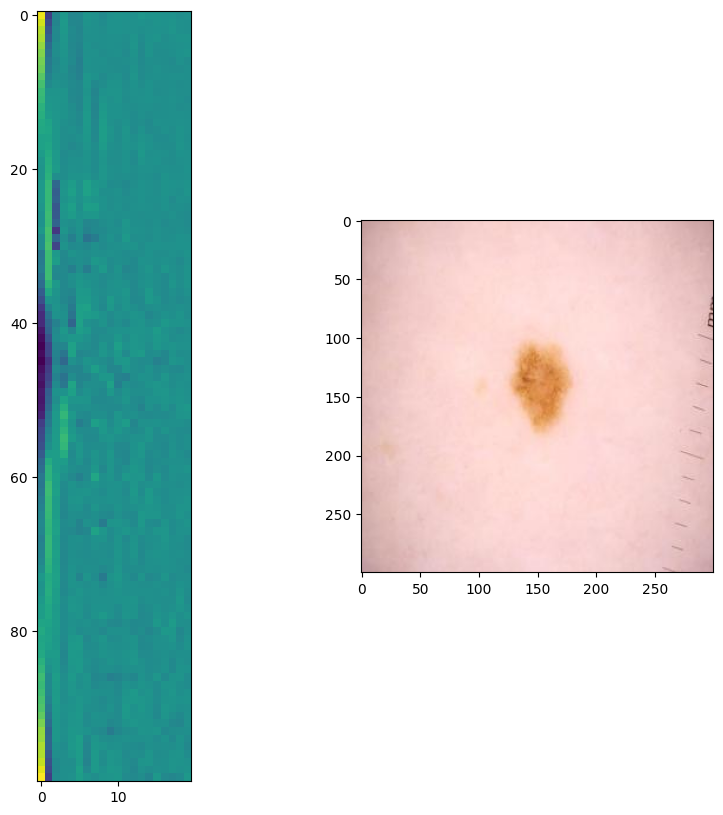

In [293]:
# example compression
img_ex = Image.open(path + "/melanoma_cancer_dataset/train/benign/melanoma_0.jpg")
img_small = img_ex.resize((100,100))
arr = np.array(img_small.getdata())
# new = np.zeros(len(arr))

# for j in range(len(arr)):
#   new[j] = compRGB(arr[j])
# print(new[0])
new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff

# conversion to matrix form
mat = new.reshape(img_small.size[0], img_small.size[1])


# # using PCA to project data to lower dim
# pca = PCA()
# pca.fit(mat)
# var = np.cumsum(pca.explained_variance_ratio_)*100
# # taking enough weight vectors for reasonable approx
# k = np.argmax(var>98)
# ipca = IncrementalPCA(n_components = k)
# img_comp = ipca.fit_transform(mat)
# img_recon = ipca.inverse_transform(img_comp)
k = 20
pca = PCA(n_components=k, svd_solver='randomized')
img_comp = pca.fit_transform(mat)
img_recon = pca.inverse_transform(img_comp)

# converting to 2d form
flat = img_recon.flatten()

# vis for comparison
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(img_comp)

trainBenignPath = Path(path + "/melanoma_cancer_dataset/train/benign").rglob('*.jpg')
plt.subplot(1, 2, 2)
plt.imshow(img_ex)


In [ ]:
# pulling datasets from kaggle
path = kagglehub.dataset_download("hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images")
print("Path to dataset files:", path)

# assigning dataset folders
trainBenignPath = Path(path + "/melanoma_cancer_dataset/train/benign").rglob('*.jpg')
trainMaligPath = Path(path + "/melanoma_cancer_dataset/train/malignant").rglob('*.jpg')
testBenignPath = Path(path + "/melanoma_cancer_dataset/test/benign").rglob('*.jpg')
testMaligPath = Path(path + "/melanoma_cancer_dataset/test/malignant").rglob('*.jpg')




# performing compression on training set (benign)
benignList = list(trainBenignPath)
trainBenign = np.zeros(shape=(len(benignList), 2000))
for i in range(len(benignList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(benignList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  # image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = img_comp.flatten()
  trainBenign[i] = flat
# print(trainBenign[0])

# saving to disk
np.save('trainBenign.npy', trainBenign)







# performing compression on training set (malignant)
maligList = list(trainMaligPath)
trainMalig = np.zeros(shape=(len(maligList), 2000))
for i in range(len(maligList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(maligList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  # image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = img_comp.flatten()
  trainMalig[i] = flat
# print(trainMalig[0])

# saving to disk
np.save('trainMalig.npy', trainMalig)







# performing compression on testing set (malignant)
maligTestList = list(testMaligPath)
testMalig = np.zeros(shape=(len(maligTestList), 2000))
for i in range(len(maligTestList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(maligTestList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  # image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = img_comp.flatten()
  testMalig[i] = flat
# print(testMalig[0])

# saving to disk
np.save('testMalig.npy', testMalig)







# performing compression on testing set (benign)
benignTestList = list(testBenignPath)
testBenign = np.zeros(shape=(len(benignTestList), 2000))
for i in range(len(benignTestList)):
  if (i % 100 == 0):
    print(i)
  # read image and resize to 100x100
  img = Image.open(benignTestList[i]).resize((100,100))
  arr = np.array(img.getdata())
  new = np.zeros(len(arr))
  # converting rgb to array to singular normalised value
  new = ((arr[:,0] << 16) + (arr[:,1] << 8) + arr[:,2]) / 0xffffff
  # conversion to matrix form
  mat = new.reshape(img.size[0], img.size[1])


  # # using PCA to project data to lower dim
  k=20
  pca = PCA(n_components=k, svd_solver='randomized')
  img_comp = pca.fit_transform(mat)
  # image_recon = pca.inverse_transform(img_comp)

  # converting to 2d form
  flat = img_comp.flatten()
  testBenign[i] = flat
# print(testBenign[0])

# saving to disk
np.save('testBenign.npy', testBenign)

In [391]:
trainB_df = pd.DataFrame(trainBenign)
trainM_df = pd.DataFrame(trainMalig)
X_train = pd.concat([trainB_df, trainM_df])

y_train = pd.DataFrame(
    {
        "label": [0] * len(trainB_df) + [1] * len(trainM_df)
    }
)

testB_df = pd.DataFrame(testBenign)
testM_df = pd.DataFrame(testMalig)
X_test = pd.concat([testB_df, testM_df])

y_test = pd.DataFrame(
    {
        "label": [0] * len(testB_df) + [1] * len(testM_df)
    }
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(9605, 2000) (1000, 2000)
(9605, 1) (1000, 1)


In [419]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(2000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile( loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['Precision', 'Recall'])

model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.6486 - Recall: 0.7076 - loss: 0.5827
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8120 - Recall: 0.7288 - loss: 0.4546
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8330 - Recall: 0.7426 - loss: 0.4159
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8547 - Recall: 0.7615 - loss: 0.3859
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8693 - Recall: 0.7783 - loss: 0.3608
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8790 - Recall: 0.7911 - loss: 0.3409
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8884 - Recall: 0.8061 - loss: 0.3232
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.8944 - Recall: 0.8211 - loss: 0.3075
Epoch 9/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9003 - Recall: 0.8346 - loss: 0.2932
Epoch 10/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision

In [420]:
loss, precision, recall = model.evaluate(X_test, y_test, verbose = 2)

print(f' Model loss on the test set: {loss}')
print(f' Model recall on the test set: {100*recall}')
print(f' Model precision on the test set: {100*precision}')

32/32 - 0s - 11ms/step - Precision: 0.8375 - Recall: 0.8040 - loss: 0.4231
 Model loss on the test set: 0.4231111407279968
 Model recall on the test set: 80.40000200271606
 Model precision on the test set: 83.74999761581421


In [421]:
model.save("model.keras")

In [422]:
# m = tf.keras.models.load_model("model.keras")
pred = model.predict(testBenign)
count = 0
for i in pred:
  if i > 0.5:
    count += 1

print(f'Benign: {count} out of {len(pred)}')

pred = model.predict(testMalig)
count = 0
for i in pred:
  if i > 0.5:
    count += 1

print(f'Malig: {count} out of {len(pred)}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Benign: 78 out of 500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Malig: 402 out of 500


In [423]:
m = tf.keras.models.load_model("model.keras")
pred = m.predict(testMalig[0][None])
if (pred > 0.5):
  print("Benign")
else:
  print("Malig")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Malig
